In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Parsing the json file generated after running the model, and storing it in dataframe format

In [3]:
with open('/content/drive/MyDrive/Aspect Term Extraction and Polarity Classification.FAST_LCF_ATEPC.result.GoogleReview_data_cleaned.json') as f:
    data = json.load(f)

print(len(data))

df = pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
counter=0
for i in data:
        if len(i['aspect']) > 0 and counter<40000:
            df = df.append({'sentence': i['sentence'], 'aspect': i['aspect'], 'confidence': i['confidence'], 'sentiment':i['sentiment']}, ignore_index=True)
            counter+=1

222015


In [4]:
df.head()

,sentence,aspect,sentiment,confidence
0,Came here for the High Tea . Great service esp...,"[service, service]","[Positive, Positive]","[0.9947, 0.9947]"
1,"5 stars for the service , even though some of ...","[service, staffs]","[Positive, Positive]","[0.483, 0.4876]"
2,"Hi , thank you for your service . But ! i feel...","[service, food, Ur, Rice]","[Negative, Negative, Negative, Negative]","[0.5896, 0.5947, 0.5962, 0.5958]"
3,I have the worse buffer dinner ever so far . T...,"[buffer dinner, spread, kung po, lamb dishes, ...","[Negative, Negative, Negative, Negative, Negat...","[0.8021, 0.7898, 0.8055, 0.8053, 0.7843]"
4,"That ' s are Known 5 Elmark "" 9H72 "" & KDK "" 3...","[Ceiling, restaurant]","[Positive, Positive]","[0.8997, 0.9016]"


Converting all the aspects to lowercase format to remove any duplicate aspects that might be present because of mismatch in casing

In [5]:
#Convert all aspects within list to lowercase
df['aspect'] = df['aspect'].apply(lambda x: [item.lower() for item in x])

# EDA:

For the EDA purpose, the aim is to analyze the polarity of the aspects based on the frequency of their occurences, and try to derive meaningful insights from them.

In [34]:
#Create word cloud for the aspects
def createWordCloud(df, numberOfValues, title, aspect):
    # create a word cloud for the aspects
    wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(' '.join(df.head(numberOfValues)[aspect]))
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

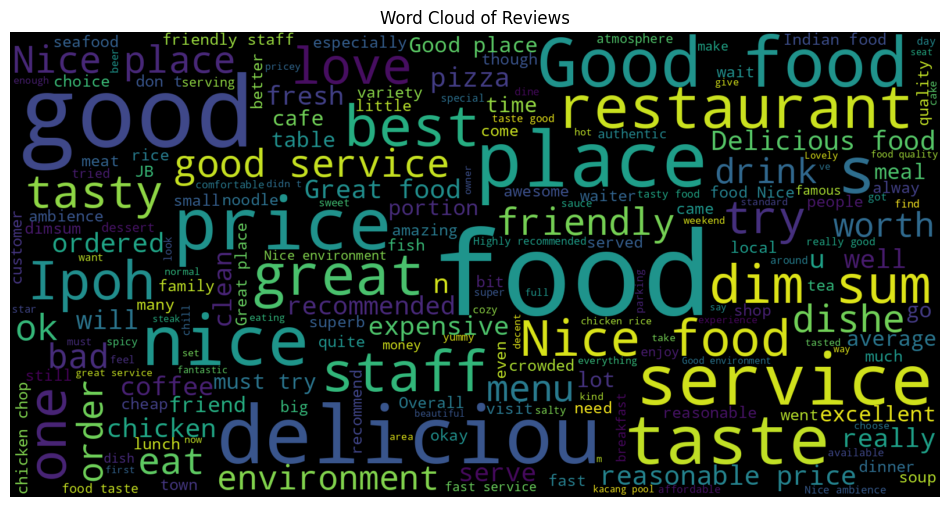

In [35]:
createWordCloud(df, len(df), "Word Cloud of Reviews", 'sentence')

Generating a pie chart based on the value of the aspect supplied. The pie chart shows the distrribtion of the polarities associated with the supplied aspect.

Positive: 12592 Negative: 1127 Neutral: 1525


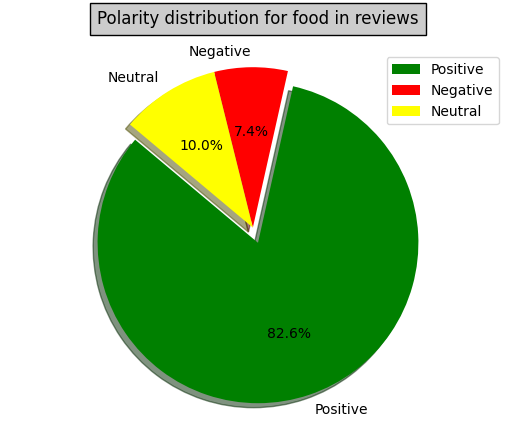

(12592, 1525, 1127)

In [43]:
#find reviews having staff as aspect

# ind=[]
# for i in range(len(df['aspect'])):
#     if 'food' in df['aspect'][i]:
#         ind.append(i)

def generatePie(aspect, general):
    pos=0
    neg=0
    neu=0
    for i, j in zip(df['aspect'], df['sentiment']):
        if general:
            for k in i:
                if aspect in k:
                    index=i.index(k)
                    if j[index]=='Positive':
                        pos+=1
                    elif j[index]=='Negative':
                        neg+=1
                    else:
                        neu+=1
        else:
            if aspect in i:
                #get the index of the staff
                index=i.index(aspect)
                if j[index]=='Positive':
                    pos+=1
                elif j[index]=='Negative':
                    neg+=1
                else:
                    neu+=1

    print("Positive:", pos, "Negative:", neg, "Neutral:", neu)
    #plot graph for pos, neg, neu pie chart

    # Data to plot
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [pos, neg, neu]
    colors = ['Green', 'Red', 'Yellow']
    explode = (0.1, 0, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.title('Polarity distribution for '+aspect+' in reviews', bbox={'facecolor':'0.8', 'pad':5}, y=1.05)
    plt.legend(labels, loc="best")

    plt.axis('equal')
    plt.show()

    return pos, neu, neg

generatePie('food', False)

Identifying the unique aspects from the dataframe, and storing it within a frequency map to obtaing the frequently occuring aspects within the reviews

In [7]:
#identify the unique aspects
unique_aspects=[]
for i in df['aspect']:
    for j in i:
        if j not in unique_aspects:
            unique_aspects.append(j)

print(unique_aspects)

['service', 'staffs', 'food', 'ur', 'rice', 'buffer dinner', 'spread', 'kung po', 'lamb dishes', 'buffet', 'ceiling', 'restaurant', 'dine - in', 'taste', 'bbq buffet', 'flyer', 'beef', 'coffee', 'ambience', 'view', 'air', 'f', 'service staff', 'breakfast buffet', 'breakfast', 'ala carte food', 'environment', 'atmosphere', 'vegetarian', 'smoke duck', 'dim sum', 'dim sums', 'foods', 'parking', 'halal', 'sum', 'takeaway', 'digital payment', 'hygience', 'duck', 'smoked duck', 'waitress', 'dishes', 'portions', 'halal dimsum', 'mooncake', 'cheng fun', 'smoked roasted duck', 'meal', 'full course dinner', 'ambiance', 'grace', 'crew', 'dining', 'ambiencefirst', 'rm', 'menu', 'scalop', 'limestone', 'waiter', 'tanah', 'entre', 'herb', 'meat finale', 'location', 'decoration', 'place', 'cave', 'dine food', 'staff', 'presentation', 'chef', 'opera music background music', 'flavour', 'five foot', 'wine', 'welcoming staff', 'bungalow', 'dining area', 'spices', 'enviroment', 'food selection', 'indian fo

In [8]:
def uniqueASpectCount(aspect):
    pos=0
    neg=0
    neu=0
    for i, j in zip(df['aspect'], df['sentiment']):
        if aspect in i:
            #get the index of the staff
            index=i.index(aspect)
            if j[index]=='Positive':
                pos+=1
            elif j[index]=='Negative':
                neg+=1
            else:
                neu+=1

    return pos, neg, neu, pos+neg+neu

Creating data frame out of the frequency map for easier operations

In [9]:
df_unique_aspect=pd.DataFrame(columns=['aspect', 'pos', 'neg', 'neu', 'total'])
for i in unique_aspects:
    pos, neg, neu, total=uniqueASpectCount(i)
    df_unique_aspect=df_unique_aspect.append({'aspect': i, 'pos': pos, 'neg': neg, 'neu': neu, 'total': total}, ignore_index=True)

df_unique_aspect.head()

,aspect,pos,neg,neu,total
0,service,4298,692,407,5397
1,staffs,414,25,17,456
2,food,12592,1127,1525,15244
3,ur,0,1,0,1
4,rice,153,34,26,213


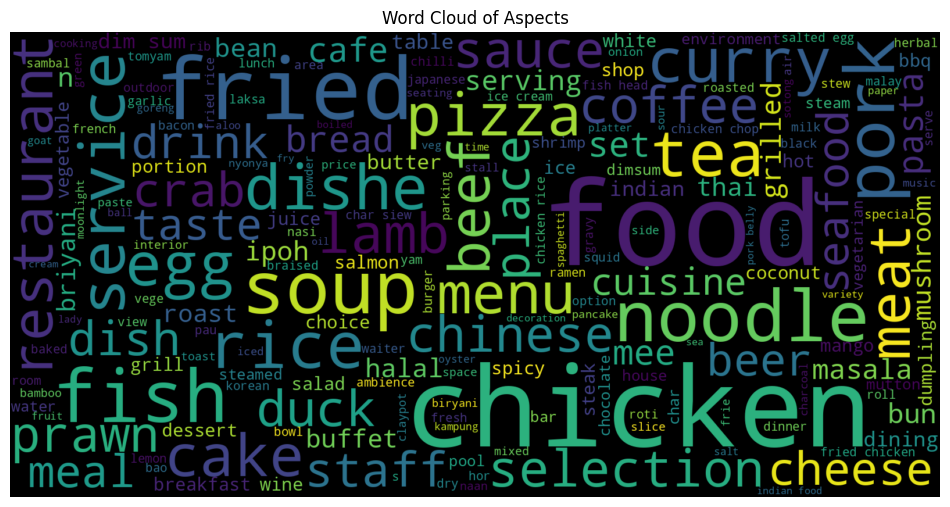

In [36]:
createWordCloud(df_unique_aspect, len(df_unique_aspect), "Word Cloud of Aspects", 'aspect')

Adding additional columns: 'pos_percentage' and 'neg_percentage' to store the ratio of the positive, and negative polarities. One thing that was observed while performing EDA was the negative/neutral feelings were lower as compared to the positive ones. So to balance it, the neutral and negative reviews have been combined (just to give an idea of the overall spread, it won't effect any of the calculations that are being done further)

In [10]:
#Creating a new column for positive and negative percentage

df_unique_aspect['pos_percent']=df_unique_aspect['pos']/df_unique_aspect['total']
df_unique_aspect['neg_percent']=(df_unique_aspect['neg']+df_unique_aspect['neu'])/df_unique_aspect['total']
df_unique_aspect.head()

,aspect,pos,neg,neu,total,pos_percent,neg_percent
0,service,4298,692,407,5397,0.796368,0.203632
1,staffs,414,25,17,456,0.907895,0.092105
2,food,12592,1127,1525,15244,0.82603,0.17397
3,ur,0,1,0,1,0.0,1.0
4,rice,153,34,26,213,0.71831,0.28169


Sorting the dataframe according to the pos_percent, neg_percent and total

In [11]:
df_unique_aspect=df_unique_aspect.sort_values(by=['pos_percent'], ascending=False)
df_unique_aspect.head()

,aspect,pos,neg,neu,total,pos_percent,neg_percent
5594,soba noodles,2,0,0,2,1.0,0.0
7150,tea spread,1,0,0,1,1.0,0.0
7140,lassi drinks,1,0,0,1,1.0,0.0
7141,curriescan,1,0,0,1,1.0,0.0
7144,indian spicy food,1,0,0,1,1.0,0.0


In [12]:
df_unique_aspect=df_unique_aspect.sort_values(by=['neg_percent'], ascending=False)
df_unique_aspect.head(20)
#filet values with total greater than 30

,aspect,pos,neg,neu,total,pos_percent,neg_percent
2551,naso,0,0,1,1,0.0,1.0
5611,crew members,0,1,0,1,0.0,1.0
262,beef dish,0,1,0,1,0.0,1.0
5608,roti canai telur,0,1,0,1,0.0,1.0
5572,luncheon meat,0,1,0,1,0.0,1.0
4671,fried cake,0,1,0,1,0.0,1.0
4669,saury,0,1,0,1,0.0,1.0
245,aloo tikki,0,1,0,1,0.0,1.0
5582,level of,0,1,0,1,0.0,1.0
5583,food stalls,0,1,0,1,0.0,1.0


In [13]:
df_unique_aspect=df_unique_aspect.sort_values(by=['total'], ascending=False)
df_unique_aspect.head()

,aspect,pos,neg,neu,total,pos_percent,neg_percent
2,food,12592,1127,1525,15244,0.82603,0.17397
0,service,4298,692,407,5397,0.796368,0.203632
66,place,3420,91,186,3697,0.925074,0.074926
69,staff,1693,182,102,1977,0.856348,0.143652
26,environment,1768,41,122,1931,0.915588,0.084412


Note:
- From the above, we notice that there are rows which have 100% positive or negative rate as certain aspects have occured only once. To nullify their effects, moving forward a filter has been put such that the total count is above a particular threshold so that such high values that are occuring only a certain number of times doesn't oversaturate the other relevant data

returnDF returns the relevant rows where a certain aspect has occured. Additionally, 'general' parameter is added such that certain general aspects could also be identified, if required. For instance, if general is set as True, then if the aspect "chicken" is passed, the function would return all the rows that have aspects like ["chicken", "chicken rice", "sour chicken"] and so on. However, if the flag is set as False, the output would only have rows that have "chicken" in their aspect.

In [14]:
#return dataframe having chicken as aspect
def returnDF(aspect, general):
    df_aspect=pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
    for i, j, k, l in zip(df['sentence'], df['aspect'], df['sentiment'], df['confidence']):
        if general:
            for m in j:
                if aspect in m:
                    df_aspect=df_aspect.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)
        else:
            if aspect in j:
                df_aspect=df_aspect.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)

    return df_aspect


# returnDF('chicken')

Positive: 2149 Negative: 210 Neutral: 204


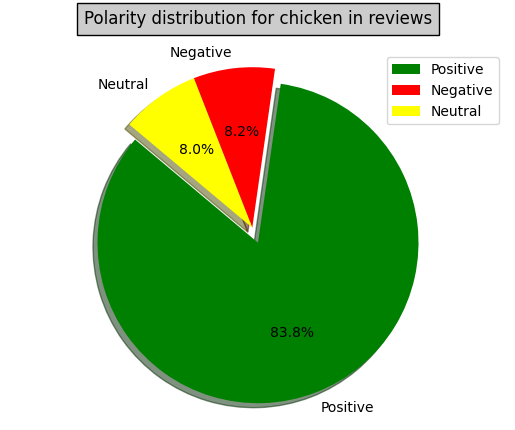

Positive: 827 Negative: 82 Neutral: 46


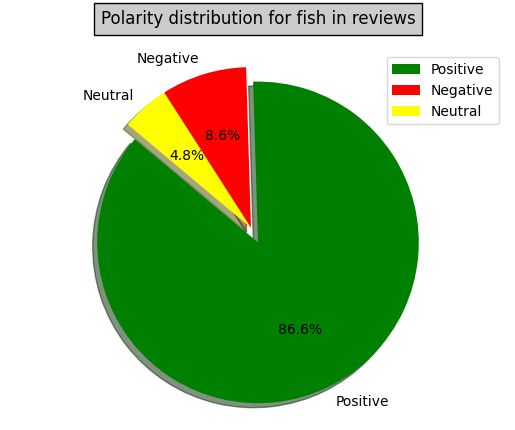

Positive: 300 Negative: 23 Neutral: 27


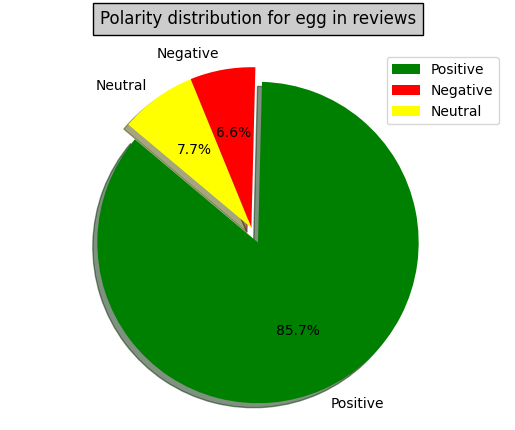

Positive: 2059 Negative: 143 Neutral: 465


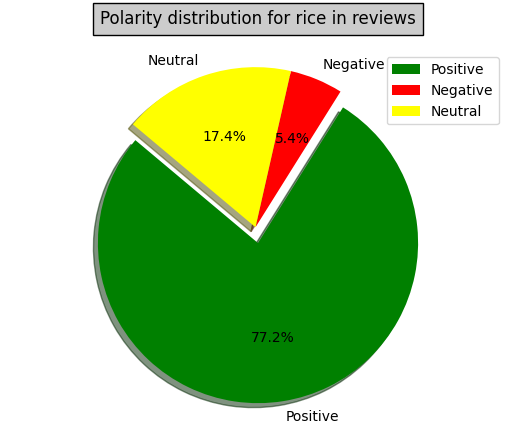

Positive: 607 Negative: 38 Neutral: 46


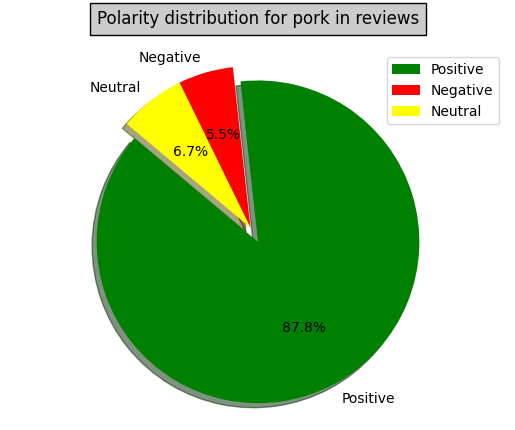

In [44]:
foodItems=["chicken", "fish", "egg", "rice", "pork"]
for i in foodItems:
  generatePie(i, True)

Positive: 26 Negative: 11 Neutral: 1


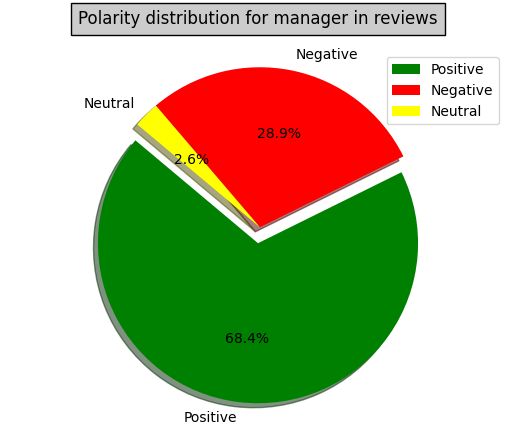

Positive: 2341 Negative: 255 Neutral: 137


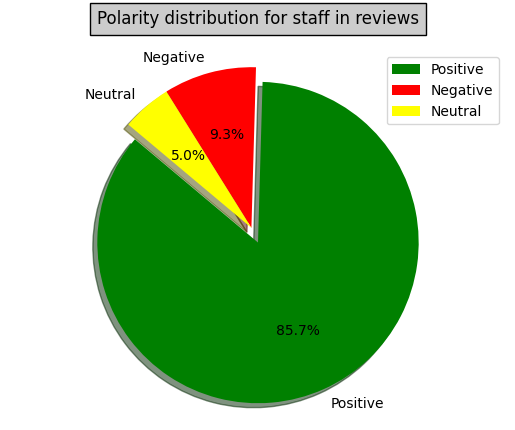

Positive: 4 Negative: 6 Neutral: 3


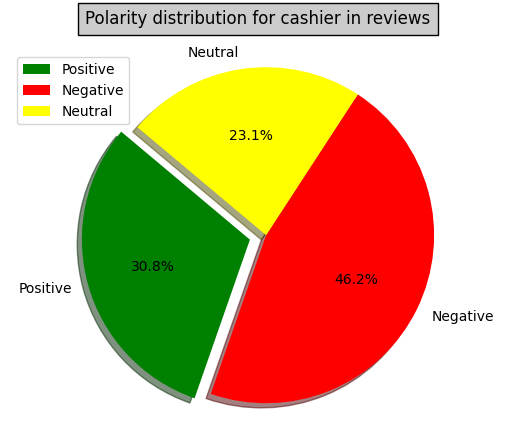

Positive: 54 Negative: 36 Neutral: 11


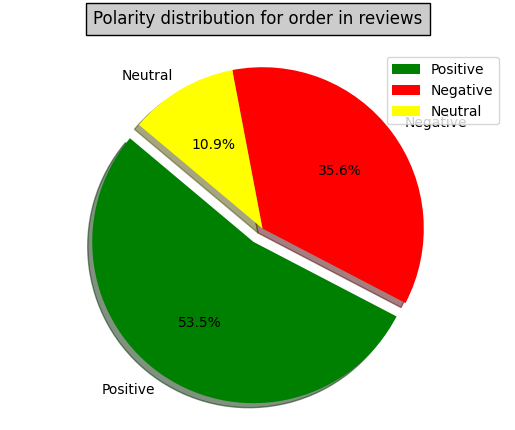

Positive: 6 Negative: 10 Neutral: 0


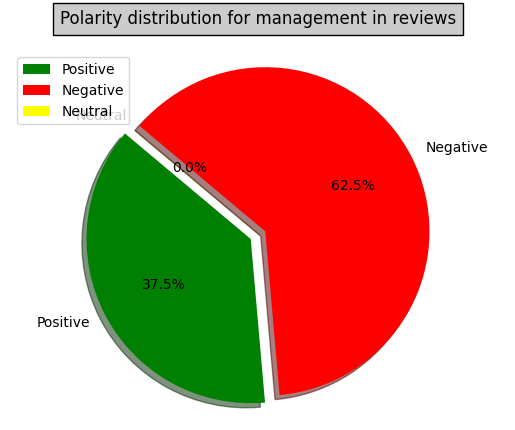

Positive: 43 Negative: 16 Neutral: 6


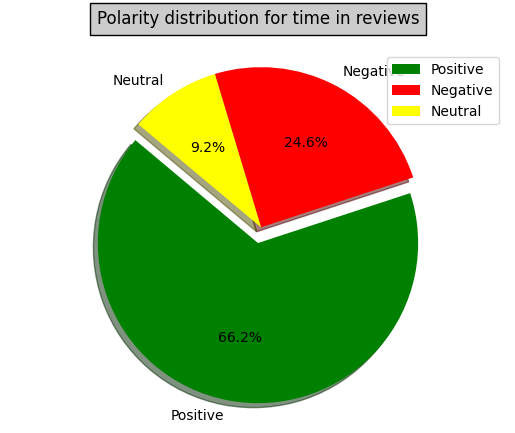

In [46]:
staffMan=["manager", "staff", "cashier", "order", "management", "time"]
for i in staffMan:
    generatePie(i, True)

Overall, it does seems that the staff review is pretty negative, but if we observe closely that low reviews occur in very less numbers as compared to the positive staff reviews. SO, there is high chance that these negative reviews probably have occured at certain  times.

Identifying the general aspects, and ordering them by frequency

In [16]:
word_count = {}
for item in unique_aspects:
    words = item.split()
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

most_common_word = max(word_count, key=word_count.get)
print(word_count)

#sort word_count dictionary
sorted_word_count = sorted(word_count.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_word_count)

{'service': 114, 'staffs': 14, 'food': 416, 'ur': 2, 'rice': 183, 'buffer': 2, 'dinner': 21, 'spread': 12, 'kung': 5, 'po': 3, 'lamb': 98, 'dishes': 118, 'buffet': 41, 'ceiling': 4, 'restaurant': 91, 'dine': 8, '-': 103, 'in': 32, 'taste': 56, 'bbq': 40, 'flyer': 1, 'beef': 107, 'coffee': 77, 'ambience': 25, 'view': 18, 'air': 36, 'f': 1, 'staff': 66, 'breakfast': 36, 'ala': 9, 'carte': 9, 'environment': 30, 'atmosphere': 12, 'vegetarian': 30, 'smoke': 7, 'duck': 102, 'dim': 51, 'sum': 50, 'sums': 4, 'foods': 57, 'parking': 19, 'halal': 43, 'takeaway': 9, 'digital': 3, 'payment': 2, 'hygience': 1, 'smoked': 20, 'waitress': 11, 'portions': 9, 'dimsum': 26, 'mooncake': 2, 'cheng': 1, 'fun': 24, 'roasted': 41, 'meal': 43, 'full': 6, 'course': 14, 'ambiance': 9, 'grace': 1, 'crew': 8, 'dining': 41, 'ambiencefirst': 1, 'rm': 3, 'menu': 85, 'scalop': 1, 'limestone': 1, 'waiter': 16, 'tanah': 1, 'entre': 2, 'herb': 6, 'meat': 90, 'finale': 1, 'location': 5, 'decoration': 10, 'place': 69, 'cav

In [17]:
print(len(sorted_word_count))
print(len(unique_aspects))

5590
11188


From the aboce, it seems that some of the most popular Non-Veg Items are Chicken, Pork, FOsj, Egg followed by Beef and Duck

In [19]:
returnDF('tuna', True)

,sentence,aspect,sentiment,confidence
0,The Tuna Cheese is simply awesome . . Served w...,"[tuna cheese, sauce, combo]","[Positive, Positive, Positive]","[0.9955, 0.9953, 0.9953]"
1,The noodle stew is . . . The tuna bread is del...,"[stew, tuna bread, chicken rice]","[Positive, Positive, Positive]","[0.9952, 0.9953, 0.9953]"
2,"Ordered baked tuna fish , not knowing it was a...","[tuna fish, escolar]","[Negative, Negative]","[0.8197, 0.8508]"
3,Very satisfied with the food and the services ...,"[food, services, staffs, tuna belly, beef]","[Positive, Positive, Positive, Positive, Posit...","[0.9877, 0.9876, 0.9881, 0.9889, 0.988]"
4,Super bad experience totally not recommend Ove...,"[chicken rice, bun, siu mai, soup, oyster, tuna]","[Positive, Positive, Positive, Positive, Posit...","[0.5581, 0.5377, 0.5676, 0.5389, 0.5421, 0.5442]"
5,It is a Japanese - style izakaya that serves c...,"[menus, drink, local, sashimi, tuna]","[Positive, Positive, Positive, Positive, Posit...","[0.4736, 0.4669, 0.4668, 0.475, 0.4727]"
6,"4 / 5 , Spicy yangyeom chicken And Tuna Rice b...","[yangyeom chicken, tuna]","[Positive, Positive]","[0.9946, 0.9946]"
7,"Children have a sushi set for lunch , and I ha...","[sushi set, tuna salad, salt, order]","[Positive, Positive, Positive, Positive]","[0.9898, 0.9894, 0.9884, 0.9884]"
8,"I always enjoy all the dishes . To be honest ,...","[dishes, tuna, boiled food]","[Positive, Positive, Positive]","[0.9938, 0.9937, 0.9943]"
9,Popular place for socializing & meals in the e...,"[place, selection, choices, drinks, tuna, teri...","[Positive, Positive, Positive, Positive, Posit...","[0.6993, 0.6937, 0.6928, 0.6923, 0.6917, 0.671..."


Creating stacked bar charts for the reviews. identifyLowPerformingAspects is used to identify the aspects which have extremely negative polarities i.e the sum of positive polarities is lesser than the sum of neutral and negative ones. These are areas were the restaurant is potentially struggling. As mentioned previously, a filter has been added to filter out any reviews that occur less frequently.

In [20]:
# create the stacked bar chart
def createStack(df_unique_aspect, sortOrder, numberOfValues, identifyLowPerformingAspects=False):
    if identifyLowPerformingAspects:
        df_unique_aspect=df_unique_aspect[df_unique_aspect['total']>5]
        df_unique_aspect=df_unique_aspect.sort_values(by=[sortOrder], ascending=False)
        df_unique_aspect=df_unique_aspect[df_unique_aspect['pos']<=df_unique_aspect['neg']+df_unique_aspect['neu']]
    # sort the dataframe
    else:
        df_unique_aspect=df_unique_aspect.sort_values(by=[sortOrder], ascending=False)
        df_unique_aspect=df_unique_aspect[df_unique_aspect['total']>10]
    print(df_unique_aspect.head(numberOfValues))

    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['pos'], label='Positive')
    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['neg'], label='Negative', bottom=df_unique_aspect.head(numberOfValues)['pos'])
    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['neu'], label='Neutral', bottom=df_unique_aspect.head(numberOfValues)['pos']+df_unique_aspect.head(numberOfValues)['neg'])
    plt.bar(df_unique_aspect.head(numberOfValues)['aspect'], df_unique_aspect.head(numberOfValues)['total'], label='Total', bottom=0, alpha=0.1)

    # set the title and axis labels
    plt.title('Stacked Bar Chart of Reviews by Aspect')
    plt.xlabel('Aspect')
    plt.ylabel('Total Reviews')

    # add the legend
    plt.legend(loc='upper right')

    #label 45 degree
    plt.xticks(rotation=45)

    # display the plot
    plt.show()

         aspect    pos   neg   neu  total pos_percent neg_percent
2          food  12592  1127  1525  15244     0.82603     0.17397
0       service   4298   692   407   5397    0.796368    0.203632
66        place   3420    91   186   3697    0.925074    0.074926
69        staff   1693   182   102   1977    0.856348    0.143652
26  environment   1768    41   122   1931    0.915588    0.084412
84        price   1210    44   364   1618    0.747837    0.252163
18     ambience   1316    17    48   1381    0.952933    0.047067
13        taste    614   155   226    995    0.617085    0.382915
17       coffee    759    25    65    849    0.893993    0.106007
32        foods    699    54    50    803    0.870486    0.129514


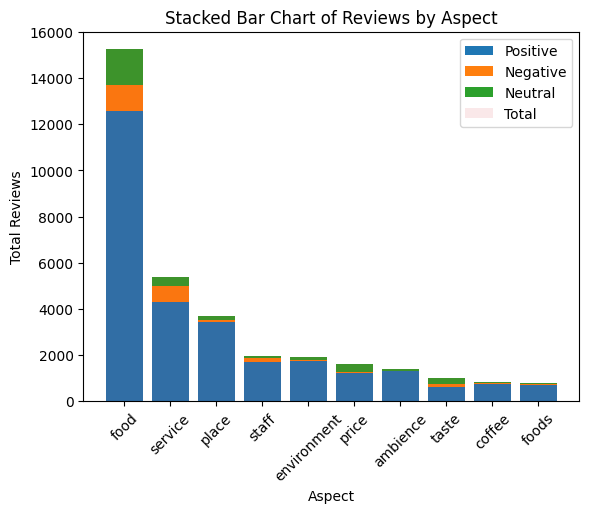

In [32]:
createStack(df_unique_aspect, 'total', 10)

The above graph shows the top 10 aspects along with their spread in polarities. It's clear that given the numbers, the restaurant is overall great in terms of Food and Service

                aspect pos neg neu total pos_percent neg_percent
416              order  26  21   7    54    0.481481    0.518519
1072  service attitude  20  20   2    42     0.47619     0.52381
1149          attitude   4  12   0    16        0.25        0.75
1025      food quality   5  10   2    17    0.294118    0.705882
1000        management   5   9   0    14    0.357143    0.642857
803            cashier   4   6   2    12    0.333333    0.666667
986             worker   6   6   1    13    0.461538    0.538462
2133              bill   0   5   1     6         0.0         1.0
560               hour   4   4   3    11    0.363636    0.636364
555       french fries   3   4   1     8       0.375       0.625


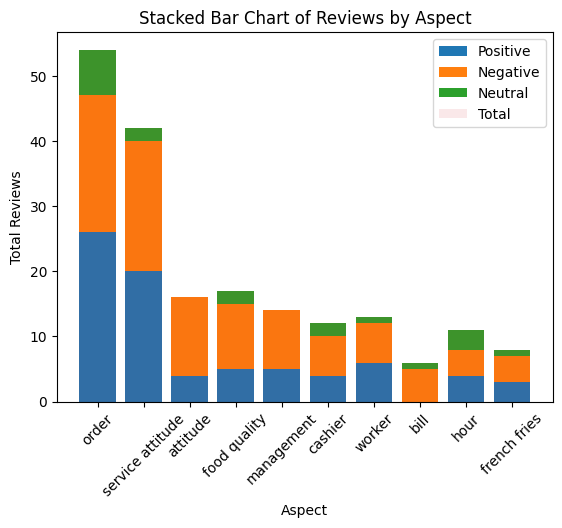

In [27]:
createStack(df_unique_aspect, 'neg', 10, True)

         aspect pos neg neu total pos_percent neg_percent
416       order  26  21   7    54    0.481481    0.518519
893        ming   3   0   3     6         0.5         0.5
7517    peanuts   2   1   3     6    0.333333    0.666667
4130    lasagna   5   3   3    11    0.454545    0.545455
276        abit   5   2   3    10         0.5         0.5
348      kailan   4   2   3     9    0.444444    0.555556
560        hour   4   4   3    11    0.363636    0.636364
803     cashier   4   6   2    12    0.333333    0.666667
1573  milkshake   3   1   2     6         0.5         0.5
797         que   3   2   2     7    0.428571    0.571429


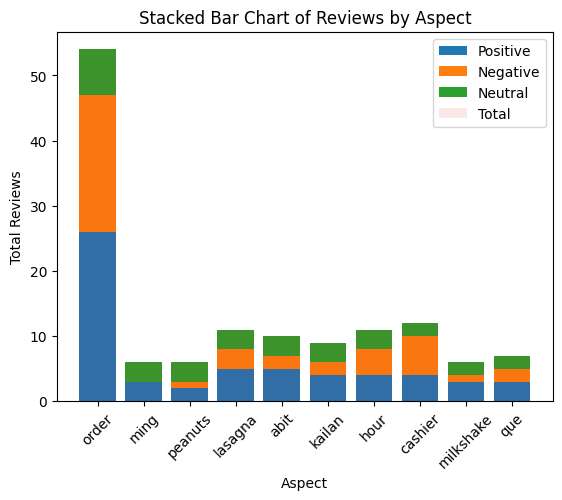

In [33]:
createStack(df_unique_aspect, 'neu', 10, True)

From the above distriibutuin, it seems that there might be some behavioral problems among staff, specially among the servers. It's also evident that there are certain issues with Food Quality, but they are also nit that often given the positive reviews regarding overall food. An indiacation of hour, and queue within the aspecys indicate that there are cases that during rush hours, there might be slow service which has inturn resulted in certain negative reviews

# Attempts on identifying why certain aspects have low confidence rate 

Note: This is a seperate attempt, and as such could be greatly influenced by the choice of dataset. However, the attempt is to find any relatable patterns that can be attributed why certain comments have aspects that were generated, but had extremely low confidence. Initial, look suggest that the model struggles to relate statements that have extremely mixed reviews.

Visualizing Comments which have lower confidences

In [47]:
#return all the rows that have confidence lesser than 0.5. COnfidence is a list of values

def returnLowConfidence():
    df_low_confidence=pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
    for i, j, k, l in zip(df['sentence'], df['aspect'], df['sentiment'], df['confidence']):
        if l[0]<0.5:
            df_low_confidence=df_low_confidence.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)

    return df_low_confidence

df_low_confidence=returnLowConfidence()

In [48]:
df_low_confidence.head()

,sentence,aspect,sentiment,confidence
0,"5 stars for the service , even though some of ...","[service, staffs]","[Positive, Positive]","[0.483, 0.4876]"
1,I just came back from there . 2 adults and 4 y...,[dine - in],[Negative],[0.439]
2,"Spacious restaurant , friendly staffs and dece...","[restaurant, staffs, foods, parking]","[Positive, Positive, Positive, Positive]","[0.4948, 0.5133, 0.4925, 0.492]"
3,Went there for the full course dinner . I expe...,[full course dinner],[Positive],[0.4891]
4,"Dining in a cave , Very special dining experie...","[ambience, food, taste, presentation, chef]","[Neutral, Neutral, Neutral, Neutral, Neutral]","[0.4461, 0.4329, 0.4324, 0.4323, 0.4321]"


In [49]:
for i in range(10):
    print(df_low_confidence.iloc[i]['sentence'])
    print()

5 stars for the service , even though some of the staffs need to be trained better , but that doesn ’ t affect the overall experience . I ’ m from the industry itself so they should be given the opportunities .

I just came back from there . 2 adults and 4 young children . We were looking for an exclusive dine - in experience after a hectic week , we were disappointed .

Spacious restaurant , friendly staffs and decent foods . However the parking will be an issue .

Went there for the full course dinner . I expected the food to taste much better for the price that they charge . They seem to be putting more focus on showcasing the use of complex ingredients in the food rather than making the food taste

Dining in a cave , Very special dining experience . Ambience is magnificent ( 5 ☆ ) . Food - 2 sets to choose from , western or M ' sian . Taste & presentation - Quite ordinary and Chef did not prepare alternatives for seafood allergy diners ( 3 ☆ ) .

Good food but not up to indian stan

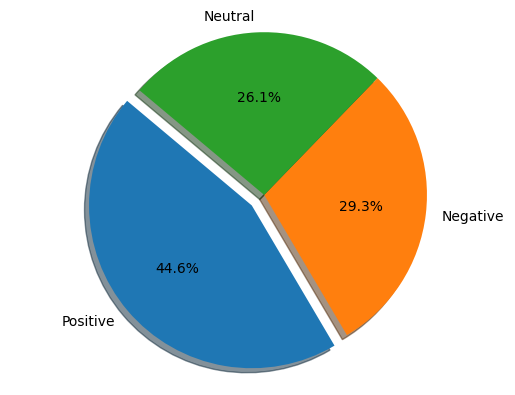

In [50]:
#calculate the frequency of positive, negative and neutral in aspects column. aspect is a list of values

def calculateFrequency(df):
    pos=0
    neg=0
    neu=0
    for i in df['sentiment']:
        for j in i:
            if j=='Positive':
                pos+=1
            elif j=='Negative':
                neg+=1
            else:
                neu+=1

    return pos, neg, neu

pos, neg, neu=calculateFrequency(df_low_confidence)

#pie chart of positive, negative and neutral
labels = 'Positive', 'Negative', 'Neutral'
sizes = [pos, neg, neu]
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


From the above distribution, we can see that the data is more or less evenly spread in terms of positive, and negative/neutral reviews

In [51]:
#length of sentence in df_low_confidence
def lengthOfSentence(df):
    length=[]
    for i in df['sentence']:
        length.append(len(i))
    return length

length=lengthOfSentence(df_low_confidence)
print(len(length))

1060


1060


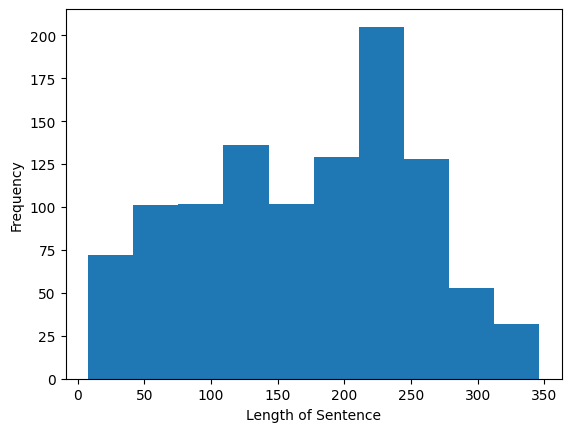

In [52]:
#Distribution of length of sentence in df smoothed

def distributionOfLength(df):
    length=[]
    for i in df['sentence']:
        length.append(len(i))
    print(len(length))
    plt.hist(length, bins=10)
    plt.xlabel('Length of Sentence')
    plt.ylabel('Frequency')
    plt.show()
    
distributionOfLength(df_low_confidence)

40000


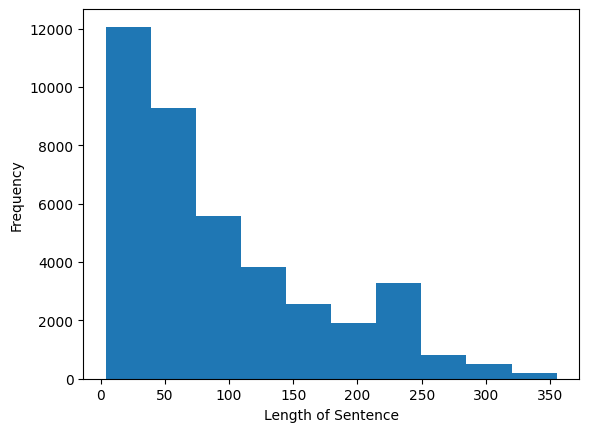

In [53]:
distributionOfLength(df)

In [54]:
#rows with confidence greater than 0.85

def returnHighConfidence():
    df_high_confidence=pd.DataFrame(columns=['sentence', 'aspect', 'sentiment', 'confidence'])
    for i, j, k, l in zip(df['sentence'], df['aspect'], df['sentiment'], df['confidence']):
        if l[0]>0.85:
            df_high_confidence=df_high_confidence.append({'sentence': i, 'aspect': j, 'sentiment': k, 'confidence': l}, ignore_index=True)

    return df_high_confidence

df_high_confidence=returnHighConfidence()

In [55]:
df_high_confidence

,sentence,aspect,sentiment,confidence
0,Came here for the High Tea . Great service esp...,"[service, service]","[Positive, Positive]","[0.9947, 0.9947]"
1,"That ' s are Known 5 Elmark "" 9H72 "" & KDK "" 3...","[ceiling, restaurant]","[Positive, Positive]","[0.8997, 0.9016]"
2,"Pros : ambience is great with lake view , good...","[ambience, view, air, service, food]","[Positive, Positive, Positive, Positive, Posit...","[0.993, 0.9914, 0.9913, 0.9912, 0.9915]"
3,"the restaurant is located inside the hotel , t...","[restaurant, food, taste]","[Neutral, Neutral, Neutral]","[0.8758, 0.8754, 0.8759]"
4,Awesome F & B service staff and good breakfast...,"[f, service staff, breakfast buffet]","[Positive, Positive, Positive]","[0.9951, 0.9952, 0.9953]"
...,...,...,...,...
29752,Affordable & yummy food,[food],[Positive],[0.9963]
29753,This is a place I have repeatedly gone back to...,"[food, lei cha, noodles, desserts, noodles]","[Positive, Positive, Positive, Positive, Posit...","[0.989, 0.9902, 0.989, 0.9901, 0.989]"
29754,"Affordable Healthier Choice , Hakka Lei Cha an...","[hakka lei cha, s trotterhakka, cha]","[Positive, Positive, Positive]","[0.9937, 0.9928, 0.994]"
29755,Service is friendly & fast . Comfortable setti...,"[service, settings, selections, dried shrimp c...","[Positive, Positive, Positive, Positive, Posit...","[0.9881, 0.9878, 0.9877, 0.9888, 0.9879]"


29757


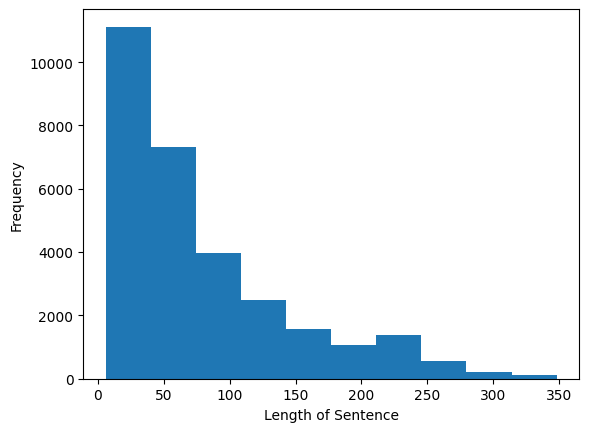

In [56]:
distributionOfLength(df_high_confidence)

From the above graphs, we can make the following conclusions:


*   The length of reviews lie between 0 and 350
*   Most of the reviews are centered around 0-50
*   The aspects that have been detected with high confidence also have reviews centered mostly around the 0-100 range 
*  Most of the aspects that have low confidence, havee peaks around reviews with length 200-250'

No. of reviews with high confidence=30k
No. of reviews with low confidence= 1.1k

From the above, we can infer that the model though has great frequencies for aspects that it's generating with high confidence, however it ocassionally struggles when the length of the sentence becomes more, and as a result we can see the peak. 

